In [14]:
import pandas as pd

In [15]:
# Spaltennamen bereinigen (Ersetzen von Leerzeichen und Sonderzeichen)
df_subject_info = pd.read_csv("./data/subject-info.csv", sep=";", encoding="utf-8")

df_subject_info.columns = (
    df_subject_info.columns.str.strip()  # Entferne führende/trailing Leerzeichen
    .str.replace(" ", "_")  # Ersetze Leerzeichen durch Unterstriche
    .str.replace("-", "_")  # Ersetze Bindestriche durch Unterstriche
    .str.replace("/", "_")  # Ersetze Schrägstriche durch Unterstriche
    .str.replace(r"[()]", "", regex=True)  # Entferne Klammern
)

# Spaltenliste nach der Bereinigung
cleaned_columns = df_subject_info.columns.tolist()

# Versuch, subject-info_codes.csv mit anderer Kodierung zu laden
try:
    df_subject_info_codes = pd.read_csv("./data/subject-info_codes.csv", sep=";", encoding="latin1")
    codes_columns = df_subject_info_codes.columns.tolist()
except Exception as e:
    codes_columns = str(e)

# Bereinigte Spalten anzeigen + Erfolgsstatus für subject-info_codes.csv
{
    "Bereinigte subject-info.csv Spalten": cleaned_columns,
    "subject-info_codes.csv Status": codes_columns,
}


{'Bereinigte subject-info.csv Spalten': ['Patient_ID',
  'Follow_up_period_from_enrollment_days',
  'days_4years',
  'Exit_of_the_study',
  'Cause_of_death',
  'Age',
  'Gender_male=1',
  'Weight_kg',
  'Height_cm',
  'Body_Mass_Index_Kg_m2',
  'NYHA_class',
  'Diastolic_blood__pressure_mmHg',
  'Systolic_blood_pressure_mmHg',
  'HF_etiology___Diagnosis',
  'Diabetes_yes=1',
  'History_of_dyslipemia_yes=1',
  'Peripheral_vascular_disease_yes=1',
  'History_of_hypertension_yes=1',
  'Prior_Myocardial_Infarction_yes=1',
  'Prior_implantable_device',
  'Prior_Revascularization',
  'Syncope',
  'daily_smoking_cigarretes_day',
  'smoke_free_time_years',
  'cigarettes__year',
  'alcohol_consumption_standard_units',
  'Albumin_g_L',
  'ALT_or_GPT_IU_L',
  'AST_or_GOT_IU_L',
  'Normalized_Troponin',
  'Total_Cholesterol_mmol_L',
  'Creatinine_?mol_L',
  'Gamma_glutamil_transpeptidase_IU_L',
  'Glucose_mmol_L',
  'Hemoglobin_g_L',
  'HDL_mmol_L',
  'Potassium_mEq_L',
  'LDL_mmol_L',
  'Sodium_m

In [16]:
# Doppelte Unterstriche entfernen und Spaltennamen weiter bereinigen
df_subject_info.columns = (
    df_subject_info.columns.str.replace("__", "_")
    .str.replace("___", "_")
    .str.replace("_=", "_")  # Falls "=" fälschlicherweise eingefügt wurde
)

# Überprüfung auf doppelte Spaltennamen
duplicate_columns = df_subject_info.columns[df_subject_info.columns.duplicated()].tolist()

# Falls es doppelte Spalten gibt, Umbenennung mit einem Suffix
if duplicate_columns:
    for col in duplicate_columns:
        df_subject_info = df_subject_info.rename(columns={col: f"{col}_dup"})

# Aktualisierte Spaltenliste nach Bereinigung
cleaned_columns_final = df_subject_info.columns.tolist()

# Ergebnisse anzeigen
{
    "Endgültige bereinigte Spalten": cleaned_columns_final,
    "Doppelte Spalten (vor der Umbenennung)": duplicate_columns,
}


{'Endgültige bereinigte Spalten': ['Patient_ID',
  'Follow_up_period_from_enrollment_days',
  'days_4years',
  'Exit_of_the_study',
  'Cause_of_death',
  'Age',
  'Gender_male=1',
  'Weight_kg',
  'Height_cm',
  'Body_Mass_Index_Kg_m2',
  'NYHA_class',
  'Diastolic_blood_pressure_mmHg',
  'Systolic_blood_pressure_mmHg',
  'HF_etiology__Diagnosis',
  'Diabetes_yes=1',
  'History_of_dyslipemia_yes=1',
  'Peripheral_vascular_disease_yes=1',
  'History_of_hypertension_yes=1',
  'Prior_Myocardial_Infarction_yes=1',
  'Prior_implantable_device',
  'Prior_Revascularization',
  'Syncope',
  'daily_smoking_cigarretes_day',
  'smoke_free_time_years',
  'cigarettes_year',
  'alcohol_consumption_standard_units',
  'Albumin_g_L',
  'ALT_or_GPT_IU_L',
  'AST_or_GOT_IU_L',
  'Normalized_Troponin',
  'Total_Cholesterol_mmol_L',
  'Creatinine_?mol_L',
  'Gamma_glutamil_transpeptidase_IU_L',
  'Glucose_mmol_L',
  'Hemoglobin_g_L',
  'HDL_mmol_L',
  'Potassium_mEq_L',
  'LDL_mmol_L',
  'Sodium_mEq_L',
  

In [17]:
# Datei als reinen Text einlesen, um die echten Spaltennamen zu erhalten
with open("./data/subject-info.csv", "r", encoding="utf-8") as f:
    first_line = f.readline().strip()

# Spaltennamen extrahieren (unverändert aus der CSV)
true_columns = first_line.split(";")

# Doppelte Spaltennamen suchen
seen = {}
new_column_names = []

for col in true_columns:
    if col in seen:
        seen[col] += 1
        new_column_names.append(f"{col}_{seen[col]}")  # Eindeutigen Namen vergeben
    else:
        seen[col] = 1
        new_column_names.append(col)

# DataFrame mit den korrigierten Spaltennamen neu laden
df_final = pd.read_csv("./data/subject-info.csv", sep=";", encoding="utf-8", names=new_column_names, skiprows=1)

# Prüfen, ob "Average RR (ms)" korrekt umbenannt wurde
rr_columns_final = [col for col in df_final.columns if "Average RR" in col or "Average_RR" in col]

# Ergebnisse anzeigen
df_final[rr_columns_final].head()


,Average RR (ms),Average RR (ms)
0,1111,984.0
1,1176,682.0
2,588,667.0
3,896,845.0
4,896,811.0


In [18]:
# Doppelte Spalten "Average RR (ms)" manuell umbenennen
rename_dict = {
    rr_columns_final[0]: "Average_RR_ms_1",
    rr_columns_final[1]: "Average_RR_ms_2"
}

# Spalten im DataFrame umbenennen
df_final = df_final.rename(columns=rename_dict)

# Endgültige Überprüfung der Spaltennamen
df_final[["Average_RR_ms_1", "Average_RR_ms_2"]].head()


,Average_RR_ms_1,Average_RR_ms_2
0,1111,984.0
1,1176,682.0
2,588,667.0
3,896,845.0
4,896,811.0


In [19]:
import os

# Sicherstellen, dass der Ordner existiert
os.makedirs("./data", exist_ok=True)

# Bereinigte CSV-Datei speichern
cleaned_csv_path = "./data/subject-info_cleaned_2.csv"
df_final.to_csv(cleaned_csv_path, sep=";", encoding="utf-8", index=False)

# Bestätigung
print(f"Datei erfolgreich gespeichert: {cleaned_csv_path}")


Datei erfolgreich gespeichert: ./data/subject-info_cleaned_2.csv


In [20]:
df = pd.read_csv("./data/subject-info_cleaned_2.csv", sep=";", encoding="utf-8")


In [21]:
df.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),...,Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,NaN,0,58,1,83,163,"31,2",...,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,NaN,0,58,1,74,160,"28,9",...,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,NaN,0,69,1,83,174,"27,4",...,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,NaN,0,56,0,84,165,"30,9",...,1,1,1,0,1,1,0,0,0,0
4,P0005,2043,1460,NaN,0,70,1,97,183,29,...,0,1,1,0,1,0,1,0,1,1


Laden und erste Sicht der Daten nach Bereinigung

📊 Datenform: (992, 103)
🔍 Erste 5 Zeilen:


,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),...,Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,NaN,0,58,1,83,163,"31,2",...,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,NaN,0,58,1,74,160,"28,9",...,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,NaN,0,69,1,83,174,"27,4",...,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,NaN,0,56,0,84,165,"30,9",...,1,1,1,0,1,1,0,0,0,0
4,P0005,2043,1460,NaN,0,70,1,97,183,29,...,0,1,1,0,1,0,1,0,1,1


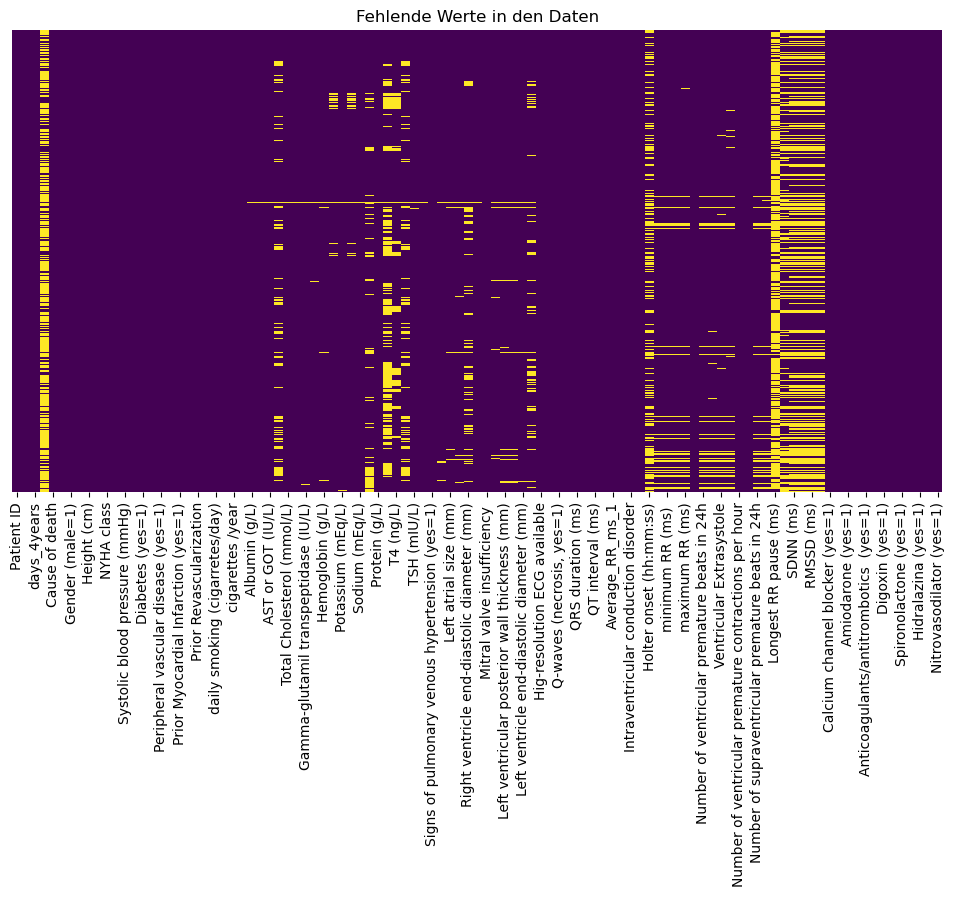


📈 Statistische Übersicht numerischer Variablen:


,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,Gender (male=1),Weight (kg),Height (cm),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),...,Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
count,992.000000,992.000000,297.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,...,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,1493.553427,1212.561492,2.858586,1.028226,0.723790,77.243952,164.631048,2.215726,74.233871,126.972782,...,0.166331,0.839718,0.680444,0.300403,0.726815,0.375000,0.492944,0.028226,0.739919,0.284274
std,611.663752,439.881734,0.442889,2.008360,0.447347,13.998521,8.926596,0.411532,12.002680,21.717763,...,0.372565,0.367053,0.466540,0.458665,0.445820,0.484367,0.500202,0.165701,0.438900,0.451296
min,33.000000,33.000000,1.000000,0.000000,0.000000,37.000000,127.000000,2.000000,40.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1082.250000,1082.250000,3.000000,0.000000,0.000000,67.000000,159.000000,2.000000,68.000000,110.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1805.000000,1460.000000,3.000000,0.000000,1.000000,76.000000,165.000000,2.000000,75.000000,125.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1913.000000,1460.000000,3.000000,1.000000,1.000000,85.000000,170.000000,2.000000,80.000000,140.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2065.000000,1460.000000,3.000000,7.000000,1.000000,130.000000,190.000000,3.000000,110.000000,213.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


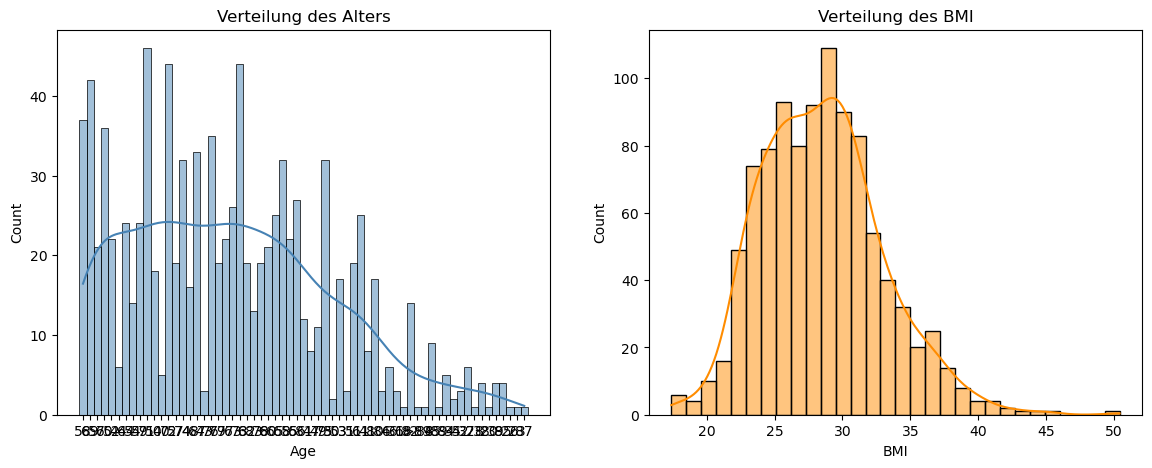

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sicherstellen, dass der Datenordner existiert
os.makedirs("./data", exist_ok=True)

# Datei einlesen (falls du die bereinigte Datei gespeichert hast)
df = pd.read_csv("./data/subject-info_cleaned_2.csv", sep=";", encoding="utf-8")

# Überblick über die Daten
print(f"📊 Datenform: {df.shape}")
print("🔍 Erste 5 Zeilen:")
display(df.head())

# Fehlende Werte analysieren
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Visualisierung der fehlenden Werte als Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Fehlende Werte in den Daten")
plt.show()

# Statistische Übersicht über numerische Features
num_features = df.select_dtypes(include=[np.number])
num_stats = num_features.describe()

print("\n📈 Statistische Übersicht numerischer Variablen:")
display(num_stats)

# Prüfen, ob "Body Mass Index (Kg/m2)" existiert und umbenennen
if "Body Mass Index (Kg/m2)" in df.columns:
    df = df.rename(columns={"Body Mass Index (Kg/m2)": "BMI"})

# Verteilung von Alter und BMI visualisieren
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Alter
sns.histplot(df["Age"], bins=30, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Verteilung des Alters")

# BMI (Komma in Punkt umwandeln für numerische Berechnung)
df["BMI"] = df["BMI"].astype(str).str.replace(",", ".").astype(float)
sns.histplot(df["BMI"], bins=30, kde=True, ax=axes[1], color="darkorange")
axes[1].set_title("Verteilung des BMI")

plt.show()


In [24]:
# Spaltennamen bereinigen (Leerzeichen durch Unterstriche ersetzen, Sonderzeichen entfernen)
df.columns = (
    df.columns.str.strip()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("/", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("?", "")
    .str.replace(">", "")
)

# One-Hot-Encoding durchführen (ohne Zeilenverlust)
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(exclude=[np.number]).columns, drop_first=False)

# Überprüfen, ob "Cause_of_death" noch existiert
if "Cause_of_death" not in df_encoded.columns and "Cause of death" in df.columns:
    df_encoded["Cause_of_death"] = df["Cause of death"]

# Prüfen, ob die Anzahl der Zeilen korrekt bleibt
print(f"📊 Zeilenanzahl nach Encoding: {df_encoded.shape[0]} (sollte 992 sein)")


📊 Zeilenanzahl nach Encoding: 992 (sollte 992 sein)


In [25]:
print(df_encoded["Cause_of_death"].value_counts())


Cause_of_death
0    726
6    100
3     94
1     61
7     11
Name: count, dtype: int64


In [26]:
print(df_encoded["Cause_of_death"].isnull().sum())


0


In [27]:
from sklearn.model_selection import train_test_split

# Fehlende Werte in numerischen Spalten mit dem Median auffüllen
for col in df_encoded.select_dtypes(include=[np.number]):
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].median())

# Sicherstellen, dass "Cause_of_death" als Zielvariable erhalten bleibt
if "Cause_of_death" not in df_encoded.columns and "Cause of death" in df_encoded.columns:
    df_encoded.rename(columns={"Cause of death": "Cause_of_death"}, inplace=True)

# Train/Test-Split durchführen
X = df_encoded.drop(columns=["Cause_of_death"])
y = df_encoded["Cause_of_death"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train- und Test-Daten speichern
train_path = "./data/train.csv"
test_path = "./data/test.csv"

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv(train_path, sep=";", encoding="utf-8", index=False)
test_data.to_csv(test_path, sep=";", encoding="utf-8", index=False)

# Ergebnisse anzeigen
{
    "Trainingsdaten gespeichert unter": train_path,
    "Testdaten gespeichert unter": test_path,
    "Form von X_train": X_train.shape,
    "Form von X_test": X_test.shape,
    "Anzahl Features nach Encoding": df_encoded.shape[1],
}


{'Trainingsdaten gespeichert unter': './data/train.csv',
 'Testdaten gespeichert unter': './data/test.csv',
 'Form von X_train': (793, 5329),
 'Form von X_test': (199, 5329),
 'Anzahl Features nach Encoding': 5330}

C:\Users\kthfu\AppData\Local\Temp\ipykernel_19184\1912617432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="coolwarm")


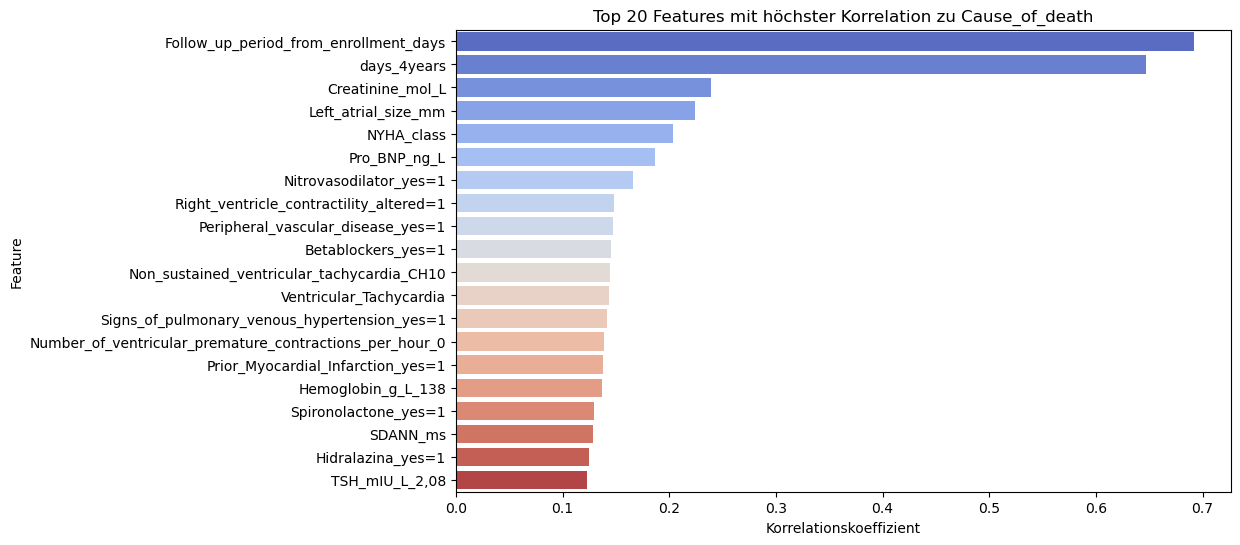

Follow_up_period_from_enrollment_days                      0.691897
days_4years                                                0.647025
Creatinine_mol_L                                           0.239282
Left_atrial_size_mm                                        0.223836
NYHA_class                                                 0.203841
Pro_BNP_ng_L                                               0.186795
Nitrovasodilator_yes=1                                     0.165931
Right_ventricle_contractility_altered=1                    0.147750
Peripheral_vascular_disease_yes=1                          0.147628
Betablockers_yes=1                                         0.145445
Non_sustained_ventricular_tachycardia_CH10                 0.144605
Ventricular_Tachycardia                                    0.143950
Signs_of_pulmonary_venous_hypertension_yes=1               0.141899
Number_of_ventricular_premature_contractions_per_hour_0    0.138731
Prior_Myocardial_Infarction_yes=1               

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationen mit der Zielvariable "Cause_of_death" berechnen
corr_matrix = df_encoded.corr()
target_corr = corr_matrix["Cause_of_death"].drop("Cause_of_death")

# Stärkste positiven & negativen Korrelationen anzeigen
top_corr_features = target_corr.abs().sort_values(ascending=False).head(20)

# Visualisierung der Top-Features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="coolwarm")
plt.xlabel("Korrelationskoeffizient")
plt.ylabel("Feature")
plt.title("Top 20 Features mit höchster Korrelation zu Cause_of_death")
plt.show()

# Ergebnisse anzeigen
top_corr_features


C:\Users\kthfu\AppData\Local\Temp\ipykernel_19184\167401343.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


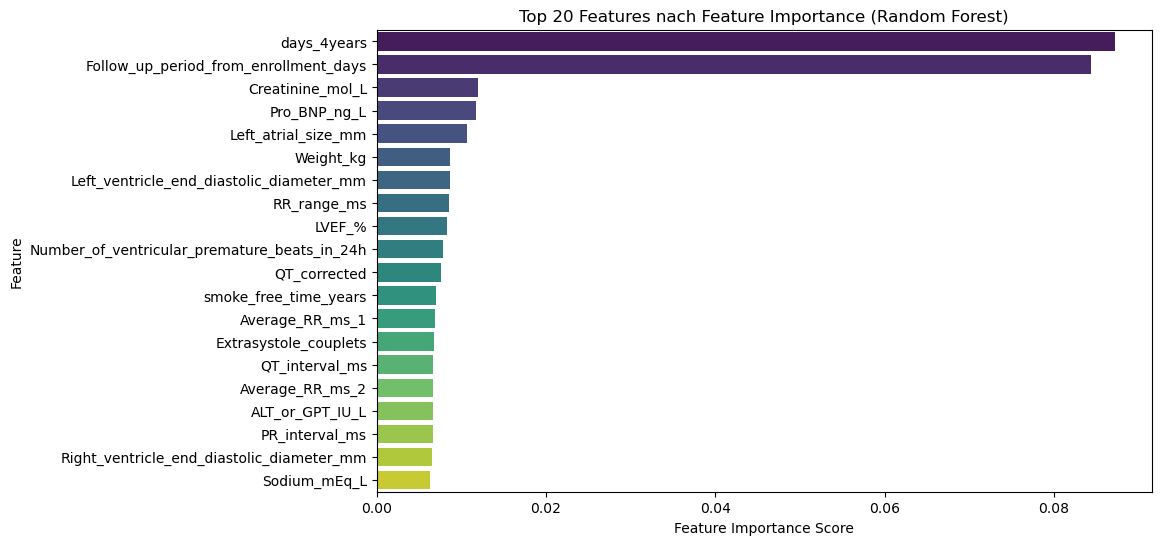

,Feature,Importance
1,days_4years,0.087218
0,Follow_up_period_from_enrollment_days,0.084357
25,Creatinine_mol_L,0.011938
27,Pro_BNP_ng_L,0.011691
29,Left_atrial_size_mm,0.010681
4,Weight_kg,0.008673
37,Left_ventricle_end_diastolic_diameter_mm,0.008613
55,RR_range_ms,0.008531
32,LVEF_%,0.008277
56,Number_of_ventricular_premature_beats_in_24h,0.007781


In [29]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Random Forest Modell initialisieren
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Modell mit Trainingsdaten trainieren
rf_model.fit(X_train, y_train)

# Feature Importances berechnen
feature_importances = rf_model.feature_importances_

# In DataFrame speichern und sortieren
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False).head(20)

# Visualisierung der wichtigsten Features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Features nach Feature Importance (Random Forest)")
plt.show()

# Ergebnisse anzeigen
feature_importance_df


In [31]:
# Liste der wichtigsten Features aus der Feature Importance Analyse
top_features = feature_importance_df["Feature"].tolist()

# Train- und Testdaten auf die wichtigsten Features beschränken
X_train_filtered = X_train[top_features]
X_test_filtered = X_test[top_features]

# Train- und Test-Daten erneut speichern
train_path_filtered = "./data/train_filtered.csv"
test_path_filtered = "./data/test_filtered.csv"

train_data_filtered = pd.concat([X_train_filtered, y_train], axis=1)
test_data_filtered = pd.concat([X_test_filtered, y_test], axis=1)

train_data_filtered.to_csv(train_path_filtered, sep=";", encoding="utf-8", index=False)
test_data_filtered.to_csv(test_path_filtered, sep=";", encoding="utf-8", index=False)

# Ergebnisse anzeigen
{
    "Trainingsdaten gespeichert unter": train_path_filtered,
    "Testdaten gespeichert unter": test_path_filtered,
    "Form von X_train (gefiltert)": X_train_filtered.shape,
    "Form von X_test (gefiltert)": X_test_filtered.shape,
}


{'Trainingsdaten gespeichert unter': './data/train_filtered.csv',
 'Testdaten gespeichert unter': './data/test_filtered.csv',
 'Form von X_train (gefiltert)': (793, 20),
 'Form von X_test (gefiltert)': (199, 20)}

In [10]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 9.6 MB/s eta 0:00:16
    --------------------------------------- 3.7/150.0 MB 10.9 MB/s eta 0:00:14
   - -------------------------------------- 5.8/150.0 MB 11.4 MB/s eta 0:00:13
   -- ------------------------------------- 8.1/150.0 MB 11.0 MB/s eta 0:00:13
   -- ------------------------------------- 10.2/150.0 MB 11.6 MB/s eta 0:00:13
   --- ------------------------------------ 13.1/150.0 MB 11.6 MB/s eta 0:00:12
   ---- ----------------------------------- 15.7/150.0 MB 11.8 MB/s eta 0:00:12
   ---- ----------------------------------- 18.6/150.0 MB 12.0 MB/s eta 0:00:11
   ----- ---------------------------------- 21.0/150.0 MB 12.1 MB/s eta 0:00:11
   ------ --------------------------------- 23.6/150.0 MB 12.0 MB/s eta 0:00:11
   ------ --------------------------------- 26.0/150.0 MB 12.1 MB/s eta 0:00:11
   ------- -------------------------------- 28.6/150.0

In [32]:
# Mapping für Cause_of_death basierend auf der Tabelle
cause_mapping = {
    0: "Survivor",
    1: "Non-Cardiac Death",
    3: "Sudden Cardiac Death (SCD)",
    6: "Pump Failure Death",
    7: "Pump Failure Death"
}

# Cause_of_death umcodieren
df_encoded["Cause_of_death"] = df_encoded["Cause_of_death"].map(cause_mapping)

# Zusätzlich eine binäre Spalte "Survived" erstellen (0 = Überlebt, 1 = Gestorben)
df_encoded["Survived"] = df_encoded["Cause_of_death"].apply(lambda x: 0 if x == "Survivor" else 1)

# Ergebnisse anzeigen
df_encoded[["Cause_of_death", "Survived"]].head()

C:\Users\kthfu\AppData\Local\Temp\ipykernel_19184\4059916507.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded["Survived"] = df_encoded["Cause_of_death"].apply(lambda x: 0 if x == "Survivor" else 1)


,Cause_of_death,Survived
0,Survivor,0
1,Survivor,0
2,Survivor,0
3,Survivor,0
4,Survivor,0


c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


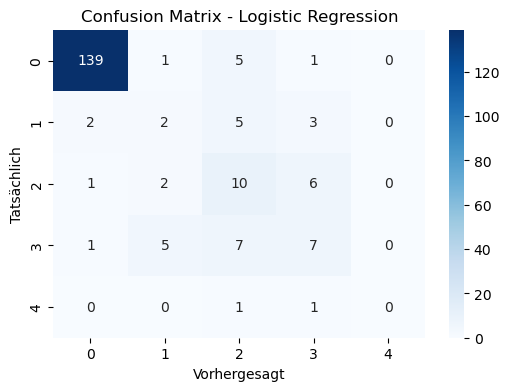

c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Modell: Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.20      0.17      0.18        12
           3       0.36      0.53      0.43        19
           6       0.39      0.35      0.37        20
           7       0.00      0.00      0.00         2

    accuracy                           0.79       199
   macro avg       0.38      0.40      0.39       199
weighted avg       0.80      0.79      0.79       199

--------------------------------------------------


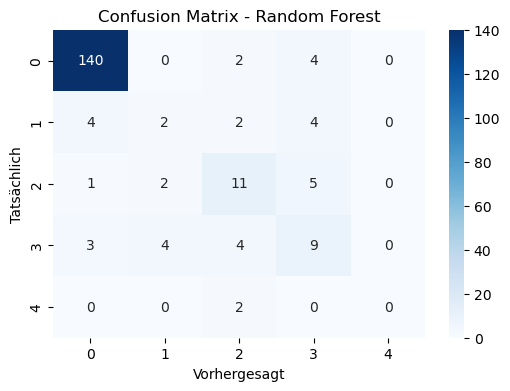

📊 Modell: Random Forest

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       146
           1       0.25      0.17      0.20        12
           3       0.52      0.58      0.55        19
           6       0.41      0.45      0.43        20
           7       0.00      0.00      0.00         2

    accuracy                           0.81       199
   macro avg       0.43      0.43      0.43       199
weighted avg       0.80      0.81      0.81       199

--------------------------------------------------


c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [0 1 3 6 7]

In [33]:
# Erforderliche Bibliotheken importieren
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

# Trainierte Daten laden
train_filtered_path = "./data/train_filtered.csv"
test_filtered_path = "./data/test_filtered.csv"

train_data_filtered = pd.read_csv(train_filtered_path, sep=";", encoding="utf-8")
test_data_filtered = pd.read_csv(test_filtered_path, sep=";", encoding="utf-8")

# Features und Zielvariable definieren
X_train_filtered = train_data_filtered.drop(columns=["Cause_of_death"])
y_train_filtered = train_data_filtered["Cause_of_death"]
X_test_filtered = test_data_filtered.drop(columns=["Cause_of_death"])
y_test_filtered = test_data_filtered["Cause_of_death"]

# Modelle initialisieren
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# Training und Evaluation
results = {}

for model_name, model in models.items():
    # Modell trainieren
    model.fit(X_train_filtered, y_train_filtered)
    
    # Vorhersagen erstellen
    y_pred = model.predict(X_test_filtered)
    
    # Metriken berechnen
    accuracy = accuracy_score(y_test_filtered, y_pred)
    f1 = f1_score(y_test_filtered, y_pred, average="weighted")
    
    # Ergebnisse speichern
    results[model_name] = {"Accuracy": accuracy, "F1-Score": f1}
    
    # Confusion Matrix visualisieren
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test_filtered, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Vorhergesagt")
    plt.ylabel("Tatsächlich")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    # Klassifikationsbericht ausgeben
    print(f"📊 Modell: {model_name}\n")
    print(classification_report(y_test_filtered, y_pred))
    print("-" * 50)

# Ergebnisse anzeigen
results


In [34]:
# Random Forest Modell erneut initialisieren mit n_jobs=1
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)

# Modell mit Trainingsdaten trainieren
rf_model.fit(X_train_filtered, y_train_filtered)

# Feature Importances berechnen
feature_importances = rf_model.feature_importances_

# In DataFrame speichern und sortieren
feature_importance_df = pd.DataFrame({"Feature": X_train_filtered.columns, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Ergebnisse anzeigen
feature_importance_df.head(20)


,Feature,Importance
0,days_4years,0.254076
1,Follow_up_period_from_enrollment_days,0.228777
2,Creatinine_mol_L,0.038055
16,ALT_or_GPT_IU_L,0.035012
3,Pro_BNP_ng_L,0.034693
15,Average_RR_ms_2,0.034420
12,Average_RR_ms_1,0.033438
9,Number_of_ventricular_premature_beats_in_24h,0.032500
14,QT_interval_ms,0.031691
5,Weight_kg,0.031126


In [13]:
# Mapping für Cause_of_death basierend auf der Tabelle
cause_mapping = {
    0: "Survivor",
    1: "Non-Cardiac Death",
    3: "Sudden Cardiac Death (SCD)",
    6: "Pump Failure Death",
    7: "Pump Failure Death"
}

# Cause_of_death umcodieren
df_encoded["Cause_of_death"] = df_encoded["Cause_of_death"].map(cause_mapping)

# Zusätzlich eine binäre Spalte "Survived" erstellen (0 = Überlebt, 1 = Gestorben)
df_encoded["Survived"] = df_encoded["Cause_of_death"].apply(lambda x: 0 if x == "Survivor" else 1)

# Ergebnisse anzeigen
df_encoded[["Cause_of_death", "Survived"]].head()


C:\Users\kthfu\AppData\Local\Temp\ipykernel_19184\3974944170.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded["Survived"] = df_encoded["Cause_of_death"].apply(lambda x: 0 if x == "Survivor" else 1)


,Cause_of_death,Survived
0,Survivor,0
1,Survivor,0
2,Survivor,0
3,Survivor,0
4,Survivor,0
